In [48]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from backtracking import resolver
import random
import time
from matplotlib import pyplot as plt

In [49]:
random.seed(67910)

In [50]:
def generar_habilidades(n):
    habilidades = []
    for _ in range(n):
        habilidades.append(random.randint(10,1000))
    return habilidades

In [51]:
cantidades =  []
tiempos = []
n = 2
xx = 10
total_iters = xx *  n * 3

for i in range(xx):
    cantidades.append(random.randint(5, 20))
    habilidades = generar_habilidades(cantidades[-1])
    cant_grupos = 3 #random.randint(2, len(habilidades)//2)
    aux = []
    for j in range(n * 3):
        inicio = time.time()
        resolver(cant_grupos, habilidades)
        aux.append(time.time() - inicio)

        pct = (i * n * 3 + j + 1) / total_iters * 100
        sys.stdout.write(f"\rIter {i+1}/{xx} — ejec {j+1}/{n * 3} ({pct:5.1f}%)")
        sys.stdout.flush()

    for _ in range(n):
       aux.remove(min(aux))
       aux.remove(max(aux))
    tiempos.append(sum(aux)/len(aux))
print()

Iter 10/10 — ejec 6/6 (100.0%)


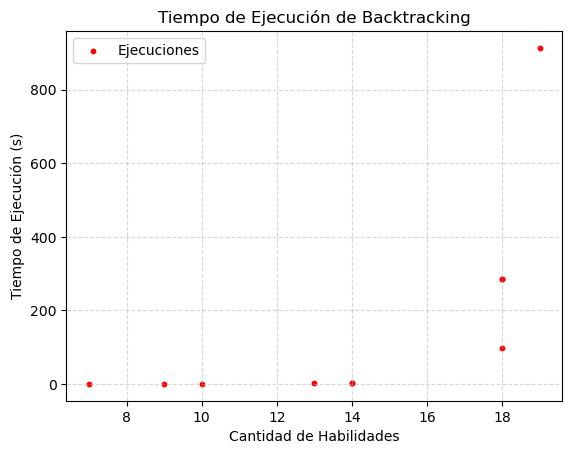

In [52]:
plt.scatter(cantidades, tiempos, color='red', label='Ejecuciones', s=10)  # marker='o' para puntos
#plt.plot(x_fit, y_fit_n, color='cyan', label='Ajuste O(n)',linestyle='--')
#plt.plot(x_fit, y_fit_nlogn, color='blue', label='Ajuste O(n.log(n))',linestyle='--')
#plt.plot(x_fit, y_fit_n2, color='green', label='Ajuste O(n²)',linestyle='--')
plt.xlabel('Cantidad de Habilidades')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempo de Ejecución de Backtracking')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.savefig("../informe/img/ajuste_backtracking.png", dpi=300, bbox_inches='tight')
plt.show()